# Machine Learning Analysis of Heart Disease Data
In this file we will be exploring our data through machine learning methods in the library sklearn. We wanted to expand on our machine learning knowledge by exploring different models in the library. We will be analyzing our data with models like KNeighbors and 

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
heart = pd.read_csv('heart_disease_uci.csv')
heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## KNeighborsClassifier
For our machine learning analysis, we started by looking at the `KNeighborsClassifier` to create a model that could help predict the heart disease stage for patients in the future considering our variables, and our most influential variables.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
heart = heart.dropna()

In [6]:
y = heart.num
X0 = heart.drop("num", axis=1)
X0 = pd.get_dummies(X0, drop_first=True)
X0.shape

(299, 21)

In [7]:
rmse = np.sqrt(np.mean((y - np.mean(y))**2))
rmse

1.2283493733353466

In [8]:
m = KNeighborsRegressor(1)
_ = m.fit(X0, y)
yhat = m.predict(X0)
rmse = np.sqrt(np.mean((y - yhat)**2))
m.score(X0, y), rmse

(1.0, 0.0)

In [9]:
m = KNeighborsRegressor(10)
_ = m.fit(X0, y)
yhat = m.predict(X0)
rmse = np.sqrt(np.mean((y - yhat)**2))
m.score(X0, y), rmse

(0.1941594015953504, 1.1026723391948388)

In [10]:
from sklearn.model_selection import train_test_split
Xt, Xv, yt, yv = train_test_split(X0, y)

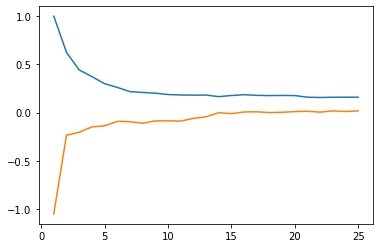

In [11]:
ks = range(1, 26)
accurt = []
accurv = []
for k in ks:
    m = KNeighborsRegressor(k)
    _ = m.fit(Xt, yt)
    acc = m.score(Xt, yt)
    accurt.append(acc)
    accv = m.score(Xv, yv)
    accurv.append(accv)
_ = plt.plot(ks, accurt)
_ = plt.plot(ks, accurv)

In [12]:
maxi = max(accurv)
index = accurv.index(maxi)
index

22

In [13]:
import statsmodels.api as sm

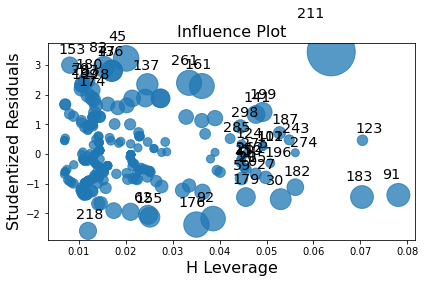

In [14]:
m = smf.ols("num ~ cp + oldpeak + ca", data = heart).fit()
m.summary()
fig = sm.graphics.influence_plot(m, criterion='cooks')
fig.tight_layout(pad=1.0)

In [15]:
y = heart.num
X0 = pd.get_dummies(heart[["ca", "cp", "oldpeak"]],
                   drop_first=True)
Xt, Xv, yt, yv = train_test_split(X0, y)

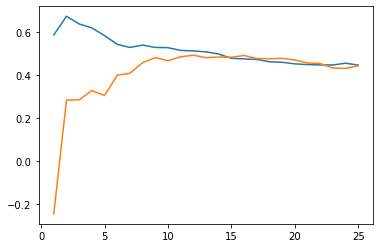

In [16]:
ks = range(1, 26)
accurt = []
accurv = []
for k in ks:
    m = KNeighborsRegressor(k)
    _ = m.fit(Xt, yt)
    acc = m.score(Xt, yt)
    accurt.append(acc)
    accv = m.score(Xv, yv)
    accurv.append(accv)
_ = plt.plot(ks, accurt)
_ = plt.plot(ks, accurv)

In [17]:
maxi = max(accurv)
index = accurv.index(maxi)
index

11